In [100]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


In [102]:
data_sensors_bucharest_path = '../Sensor data Bucharest.csv'
data_sensors_bucharest = pd.read_csv(data_sensors_bucharest_path, delimiter=',')

# Convert Timestamp column to datetime
data_sensors_bucharest['date'] = pd.to_datetime(data_sensors_bucharest['date'], errors='coerce', utc=True)
data_sensors_bucharest

,date,status,sensor id,location name,city name
0,2024-10-10 05:11:34+00:00,True,863213040205978,Veteranilor,Bucharest
1,2024-10-10 06:33:08+00:00,True,863213040219615,Veteranilor,Bucharest
2,2024-10-10 06:33:24+00:00,False,863213040219615,Veteranilor,Bucharest
3,2024-10-10 06:50:57+00:00,False,863213040204880,Veteranilor,Bucharest
4,2024-10-10 06:55:46+00:00,True,863213040219615,Veteranilor,Bucharest
...,...,...,...,...,...
54941,2025-09-22 13:11:12+00:00,True,863213040215126,Veteranilor,Bucharest
54942,2025-09-22 13:11:24+00:00,True,863213040198850,Cernișoara,Bucharest
54943,2025-09-22 13:11:50+00:00,False,863213040198850,Cernișoara,Bucharest
54944,2025-09-22 13:12:15+00:00,True,863213040219615,Veteranilor,Bucharest


In [103]:
df = data_booking_bucharest.copy()

locations = ["Veteranilor", "Cernișoara", "Piața Orizont", "Piața Valea Ialomiței"]
df = df[df["Smart Zone"].isin(locations)].copy()

df["day"] = df["start time"].dt.floor("D")

counts = (
    df.groupby(["day", "Smart Zone"])
      .size()
      .unstack("Smart Zone")
      .reindex(columns=locations)
      .fillna(0).astype(int)
)

mask_all_present = (counts > 0).all(axis=1)
days_all4 = counts.index[mask_all_present]

print("Aantal dagen met boekingen op alle 4 locaties:", mask_all_present.sum())
print("Voorbeeld:", days_all4[:10].tolist())

counts_all4 = counts.loc[mask_all_present].sort_index()
counts_all4.head()

Aantal dagen met boekingen op alle 4 locaties: 0
Voorbeeld: []


Smart Zone,Veteranilor,Cernișoara,Piața Orizont,Piața Valea Ialomiței
day,,,,


In [104]:
#Code for checking the overlapping datapoints between the different smart zones in Bucharest
df = data_sensors_bucharest.copy()  
locations = ["Veteranilor", "Cernișoara", "Piața Orizont", "Piața Valea Ialomiței"]
MIN_ROWS_PER_DAY = 1   



df = df[df["location name"].isin(locations)].copy()

df["day"] = df["date"].dt.floor("D")

counts = (
    df.groupby(["day", "location name"])
      .size()
      .unstack("location name")
      .reindex(columns=locations)      
      .fillna(0).astype(int)
)

mask_all_present = (counts >= MIN_ROWS_PER_DAY).all(axis=1)
days_all4 = counts.index[mask_all_present]

print("Number of days with data for all 4 smart zones:", mask_all_present.sum())

counts_all4 = counts.loc[mask_all_present].sort_index()
counts_all4.head()

Number of days with data for all 4 smart zones: 22


location name,Veteranilor,Cernișoara,Piața Orizont,Piața Valea Ialomiței
day,,,,
2025-09-01 00:00:00+00:00,166,522,10,23
2025-09-02 00:00:00+00:00,243,482,122,252
2025-09-03 00:00:00+00:00,151,472,143,261
2025-09-04 00:00:00+00:00,111,793,63,301
2025-09-05 00:00:00+00:00,247,969,84,258


In [105]:
#make groups based on the location names
data_bucharest_locations = data_sensors_bucharest.groupby("location name")

#get the seperate groups 
data_veteranilor = data_bucharest_locations.get_group("Veteranilor")
data_cernisoara = data_bucharest_locations.get_group("Cernișoara")
data_piata_orizont = data_bucharest_locations.get_group("Piața Orizont")
data_piata_valuea_ialomitei = data_bucharest_locations.get_group("Piața Valea Ialomiței")



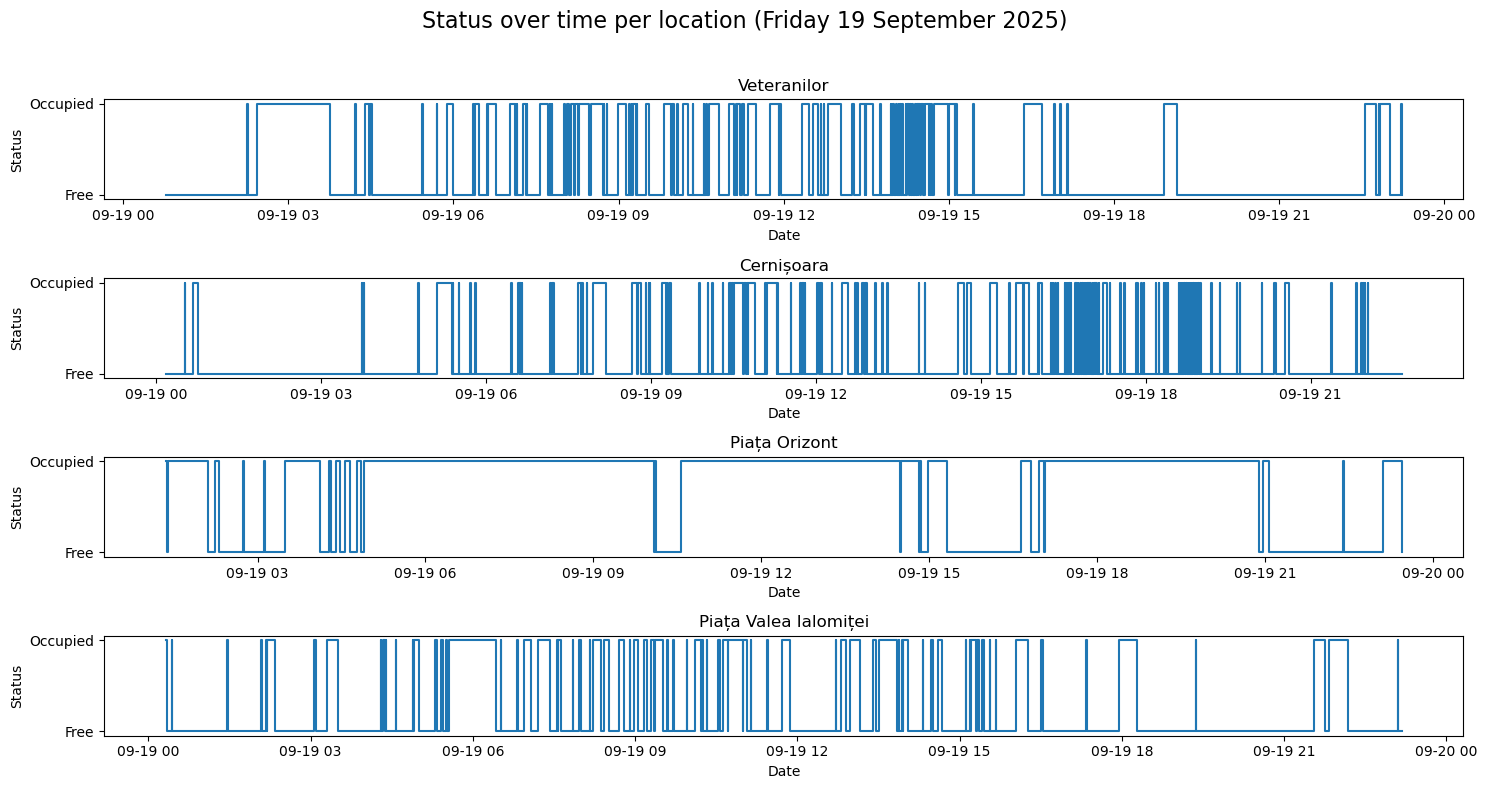

In [106]:
#Fill in the date that you want to see!
start_date = "2025-09-19"
end_date   = "2025-09-20"

# maak 'm expliciet van start_date
date_obj = pd.to_datetime(start_date, utc=True)   # of zonder utc als je lokaal wil
date_str = date_obj.strftime("%A %d %B %Y")



fig, axes = plt.subplots(4, 1, figsize=(15,8), sharey=True)

locations = {
    "Veteranilor": data_veteranilor,
    "Cernișoara": data_cernisoara,
    "Piața Orizont": data_piata_orizont,
    "Piața Valea Ialomiței": data_piata_valuea_ialomitei
}

axes = axes.flatten() 

for ax, (name, df) in zip(axes, locations.items()):
    mask = (df["date"] >= start_date) & (df["date"] < end_date)
    subset = df.loc[mask]

    ax.step(subset["date"], subset["status"], where="post")
    ax.set_title(name)
    ax.set_xlabel("Date")
    ax.set_yticks([0,1])
    ax.set_yticklabels(["Free", "Occupied"])

axes[0].set_ylabel("Status")
axes[1].set_ylabel("Status")
axes[2].set_ylabel("Status")
axes[3].set_ylabel("Status")

plt.suptitle(f"Status over time per location ({date_str})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # ruimte laten voor suptitle
plt.show()

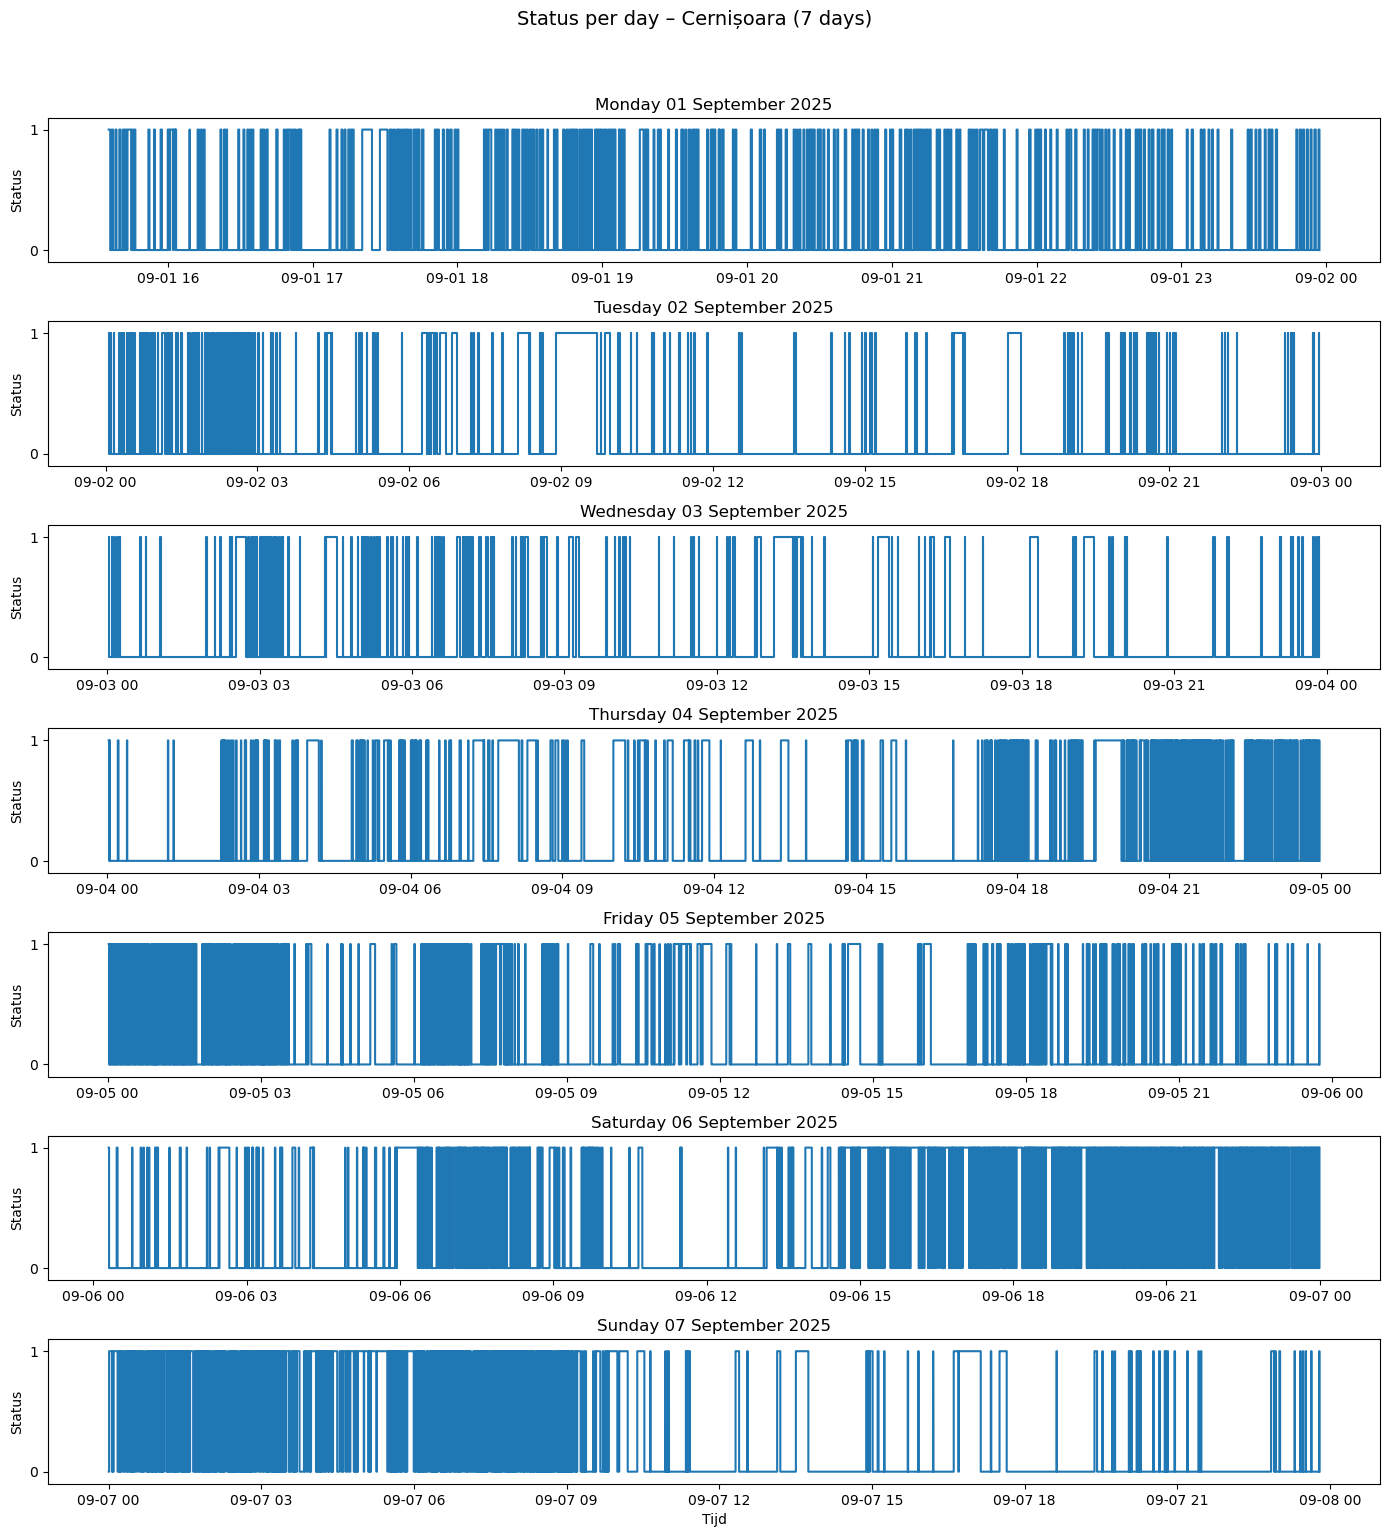

In [107]:
df_loc = data_cernisoara.copy()      
start_date = "2025-09-01"             
num_days = 7                          



days = pd.date_range(pd.to_datetime(start_date), periods=num_days, freq="D", tz="UTC")

fig, axes = plt.subplots(num_days, 1, figsize=(14, 2.2*num_days), sharex=False, sharey=True)
if num_days == 1:
    axes = [axes] 

for ax, day in zip(axes, days):
    day_start = day
    day_end   = day + pd.Timedelta(days=1)

    subset = df_loc[(df_loc["date"] >= day_start) & (df_loc["date"] < day_end)]

    if not subset.empty:
        ax.step(subset["date"], subset["status"], where="post")
    else:
        ax.text(0.5, 0.5, "No data available", ha="center", va="center", transform=ax.transAxes)

    
    ax.set_yticks([0, 1])
    ax.set_ylim(-0.1, 1.1)
    ax.set_ylabel("Status")

    
    ax.set_title(day.strftime("%A %d %B %Y"))


axes[-1].set_xlabel("Tijd")

plt.suptitle("Status per day – Cernișoara (7 days)", y=0.995, fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [108]:
data_booking_bucharest_path = '../Booking data Bucharest.csv'
data_booking_bucharest = pd.read_csv(data_booking_bucharest_path, delimiter=',')


data_booking_bucharest['start time'] = pd.to_datetime(data_booking_bucharest['start time'], errors='coerce', utc=True)
data_booking_bucharest['end time'] = pd.to_datetime(data_booking_bucharest['end time'], errors='coerce', utc=True)
data_booking_bucharest

/var/folders/mb/m61rwffd0nd5sjp246scnmpc0000gn/T/ipykernel_75094/2975333545.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_booking_bucharest['start time'] = pd.to_datetime(data_booking_bucharest['start time'], errors='coerce', utc=True)
/var/folders/mb/m61rwffd0nd5sjp246scnmpc0000gn/T/ipykernel_75094/2975333545.py:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_booking_bucharest['end time'] = pd.to_datetime(data_booking_bucharest['end time'], errors='coerce', utc=True)


,reservation id,email,license plate,start time,end time,Smart Zone,City,Reservation Duration,Anonymous
0,ROBU1232A9,iskandar@tange.eu,FVGP98,2023-12-21 09:15:00+00:00,2023-12-21 09:30:00+00:00,Piața Orizont,Bucharest,0:15:00,No
1,ROBU123472,iskandar@tange.eu,38HTTS,2023-12-21 08:30:00+00:00,2023-12-21 09:00:00+00:00,Piața Orizont,Bucharest,0:30:00,No
2,ROBU1319H2,tymenjanbronda@planet.nl,SR853V,2024-01-04 15:15:00+00:00,2024-01-04 15:45:00+00:00,Piața Orizont,Bucharest,0:30:00,No
3,ROBU1457AI,valentinob15@hotmail.com,HUTFVB,2024-01-31 08:15:00+00:00,2024-01-31 08:45:00+00:00,Piața Orizont,Bucharest,0:30:00,No
4,ROBU15304K,neaguemanuel@yahoo.ro,B620pre,2024-02-09 12:15:00+00:00,2024-02-09 12:30:00+00:00,Piața Orizont,Bucharest,0:15:00,Yes
...,...,...,...,...,...,...,...,...,...
99,ROBU925FL,jaap@hdgfdh.com,VN-14-RKS,2023-10-31 10:30:00+00:00,2023-10-31 10:45:00+00:00,Piața Orizont,Bucharest,0:15:00,Yes
100,ROBU926LK,iskandar@tange.eu,38HTTS,2023-10-31 10:30:00+00:00,2023-10-31 10:45:00+00:00,Piața Orizont,Bucharest,0:15:00,No
101,ROBU9275O,iskandar@tange.eu,38HTTS,2023-10-31 14:30:00+00:00,2023-10-31 15:00:00+00:00,Piața Orizont,Bucharest,0:30:00,No
102,ROBU9788G,luveres@yahoo.com,B124emp,2023-11-14 09:00:00+00:00,2023-11-14 09:15:00+00:00,Piața Orizont,Bucharest,0:15:00,Yes


In [109]:
data_booking_bucharest_locations = data_booking_bucharest.groupby("Smart Zone")

#get the seperate groups 
data_veteranilor_booking = data_booking_bucharest_locations.get_group("Veteranilor")
data_cernisoara_booking = data_booking_bucharest_locations.get_group("Cernișoara")
data_piata_orizont_booking = data_booking_bucharest_locations.get_group("Piața Orizont")
data_piata_valuea_ialomitei_booking = data_booking_bucharest_locations.get_group("Piața Valea Ialomiței")

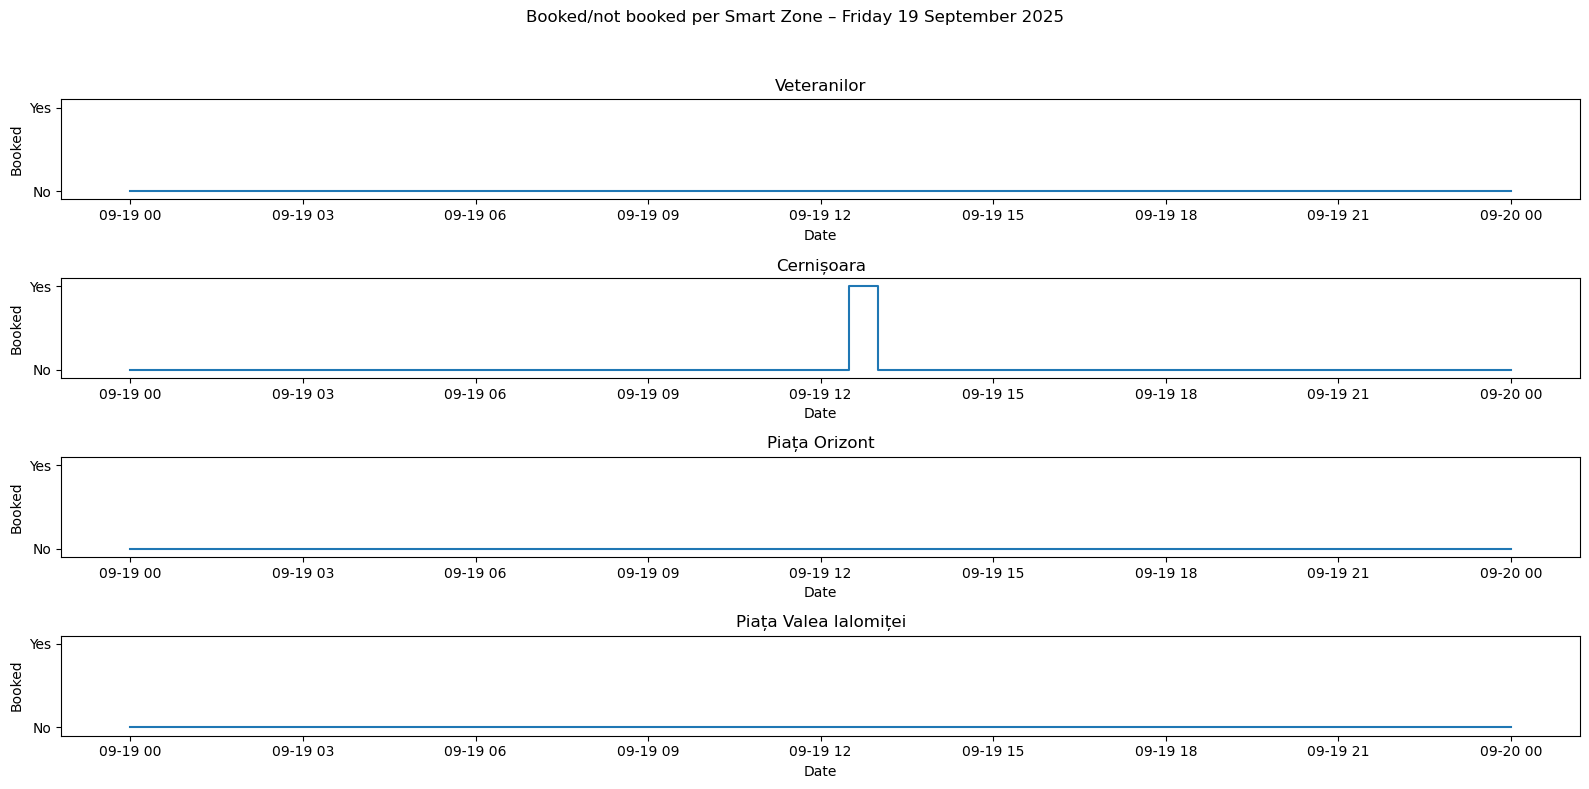

In [110]:
start_date = "2025-09-19"     
end_date   = "2025-09-20"     

df = data_booking_bucharest.copy()


# Filter op zone
dfz = df[df["Smart Zone"] == ZONE].dropna(subset=["start time","end time"]).copy()

# Snij de intervallen op het venster zodat alles binnen [start_date, end_date) valt
start_dt = pd.to_datetime(start_date, utc=True)
end_dt   = pd.to_datetime(end_date,   utc=True)

# Intervallen die overlappen met het venster houden
overlap = (dfz["start time"] < end_dt) & (dfz["end time"] > start_dt)
dfz = dfz[overlap].copy()

# Clip de randen op het venster
dfz["t_start"] = dfz["start time"].clip(lower=start_dt, upper=end_dt)
dfz["t_end"]   = dfz["end time"].clip(lower=start_dt, upper=end_dt)

# ---- Event-reeks bouwen ----
starts = dfz[["t_start"]].rename(columns={"t_start":"t"}).assign(delta=1)
ends   = dfz[["t_end"]  ].rename(columns={"t_end":"t"}).assign(delta=-1)
events = pd.concat([starts, ends], ignore_index=True)

# Groepeer gebeurtenissen op exact gelijke tijdstippen (soms starten/eindigen meerdere tegelijk)
events = events.groupby("t", as_index=True)["delta"].sum().sort_index()

# Beginbezetting als er reserveringen doorlopen op start_dt
carry = ((dfz["start time"] < start_dt) & (dfz["end time"] > start_dt)).sum()

# Cumulatief aantal gelijktijdige reserveringen
count = events.cumsum().astype(int) + carry

# Status 0/1 (booked/not booked) op elk event-tijdstip
status = (count > 0).astype(int)

# Voor nette staaf/stap-lijn ook het beginpunt opnemen
if start_dt not in status.index:
    status = pd.concat([pd.Series({start_dt: (carry > 0)*1}, name="delta"), status]).sort_index()

# En een eindpunt zodat de lijn netjes stopt op end_dt
if end_dt not in status.index:
    status.loc[end_dt] = status.iloc[-1]
    status = status.sort_index()

# ---- Plotten: stapgrafiek (zonder schuine lijnen) ----
zones = ["Veteranilor", "Cernișoara", "Piața Orizont", "Piața Valea Ialomiței"]
fig, axes = plt.subplots(4, 1, figsize=(16,8), sharey=True)
axes = axes.flatten()

for ax, ZONE in zip(axes, zones):
    dfz = df[df["Smart Zone"] == ZONE].dropna(subset=["start time","end time"]).copy()
    overlap = (dfz["start time"] < end_dt) & (dfz["end time"] > start_dt)
    dfz = dfz[overlap].copy()
    dfz["t_start"] = dfz["start time"].clip(lower=start_dt, upper=end_dt)
    dfz["t_end"]   = dfz["end time"].clip(lower=start_dt, upper=end_dt)

    starts = dfz[["t_start"]].rename(columns={"t_start":"t"}).assign(delta=1)
    ends   = dfz[["t_end"]  ].rename(columns={"t_end":"t"}).assign(delta=-1)
    events = pd.concat([starts, ends], ignore_index=True)
    events = events.groupby("t")["delta"].sum().sort_index()
    carry = ((dfz["start time"] < start_dt) & (dfz["end time"] > start_dt)).sum()
    count = events.cumsum().astype(int) + carry
    status = (count > 0).astype(int)
    if start_dt not in status.index:
        status = pd.concat([pd.Series({start_dt: (carry>0)*1}), status]).sort_index()
    if end_dt not in status.index:
        status.loc[end_dt] = status.iloc[-1]; status = status.sort_index()

    ax.step(status.index, status.values, where="post")
    ax.set_title(ZONE)
    ax.set_xlabel("Date")
    ax.set_yticks([0,1]); ax.set_ylim(-0.1,1.1)
    ax.set_yticklabels(["No", "Yes"])

axes[0].set_ylabel("Booked")
axes[1].set_ylabel("Booked")
axes[2].set_ylabel("Booked")
axes[3].set_ylabel("Booked")

plt.suptitle(f"Booked/not booked per Smart Zone – {start_dt.strftime('%A %d %B %Y')}", y=0.98)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()